## Movie Sentiment Analysis

### Background

Sentiment Analysis is a technique used in natural language processing to identify and extract sentiments or opinions expressed in text data. The primary objective of sentiment analysis is to comprehend the sentiment enclosed in text, whether positive, negative or neutral. One approach to classify sentiments is to use supervised learning algorithms and deep learning neural networks.

Movie reviews are often used to gauge the performance of a movie, and are often a source of by movie studios and potential viewers to gain insight on the film's strong or weak points. Applying sentiment analysis on movie reviews can help better understand a user's attitude towards the film and, despite their ratings.

### Data Exploration

In [2]:
import pandas as pd
from bs4 import BeautifulSoup, MarkupResemblesLocatorWarning
import warnings
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download("averaged_perceptron_tagger", quiet=True)
nltk.download("wordnet", quiet=True)
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)
warnings.filterwarnings("ignore", category=MarkupResemblesLocatorWarning)

In [3]:
reviews = pd.read_csv("IMDB Dataset.csv")
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
reviews.nunique()

review       49582
sentiment        2
dtype: int64

Previewing our data, we can see that a majority of the 50,000 reviews are unique, which makes sense as each review are unique strings of long text. Our reviews are split into 2 categories: positive or negative.

In [6]:
reviews.isna().sum()

review       0
sentiment    0
dtype: int64

### Text Cleaning

In [7]:
reviews["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

Some issues we can see from the text are:
- Casing inconsistency
- Punctuation
- HTML Tags

These will need to be removed to help feed our later models better data.

#### Applying Lowercase 

In [8]:
reviews["review"] = reviews["review"].apply(lambda x: x.lower() if isinstance(x, str) else x)
reviews["review"][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

#### Removing HTML Tags

In [9]:
reviews["review"] = reviews["review"].apply(lambda x: BeautifulSoup(str(x), "html.parser").get_text())
reviews["review"][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

#### Punctuation and Non-Words

In [10]:
reviews["review"] = reviews["review"].replace(to_replace=r"[^\w\s]", value="", regex=True)
reviews["review"][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

#### Removing Digits

In [11]:
reviews["review"] = reviews["review"].replace(to_replace=r"\d", value="", regex=True)
reviews["review"][0]

'one of the other reviewers has mentioned that after watching just  oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty picture

#### Tokenization

In [12]:
reviews["review"] = reviews["review"].apply(word_tokenize)

#### Stop Word Removal

In [13]:
stop_words = set(stopwords.words("english"))
reviews["review"] = reviews["review"].apply(lambda x: [word for word in x if word not in stop_words])

#### Lemmatization

In [14]:
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {
            "J": wordnet.ADJ,
            "N": wordnet.NOUN,
            "V": wordnet.VERB,
            "R": wordnet.ADV
        }
        return tag_dict.get(tag, wordnet.NOUN)
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return lemmas
reviews["review"] = reviews["review"].apply(lemmatize_tokens)

### Exploratory Data Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


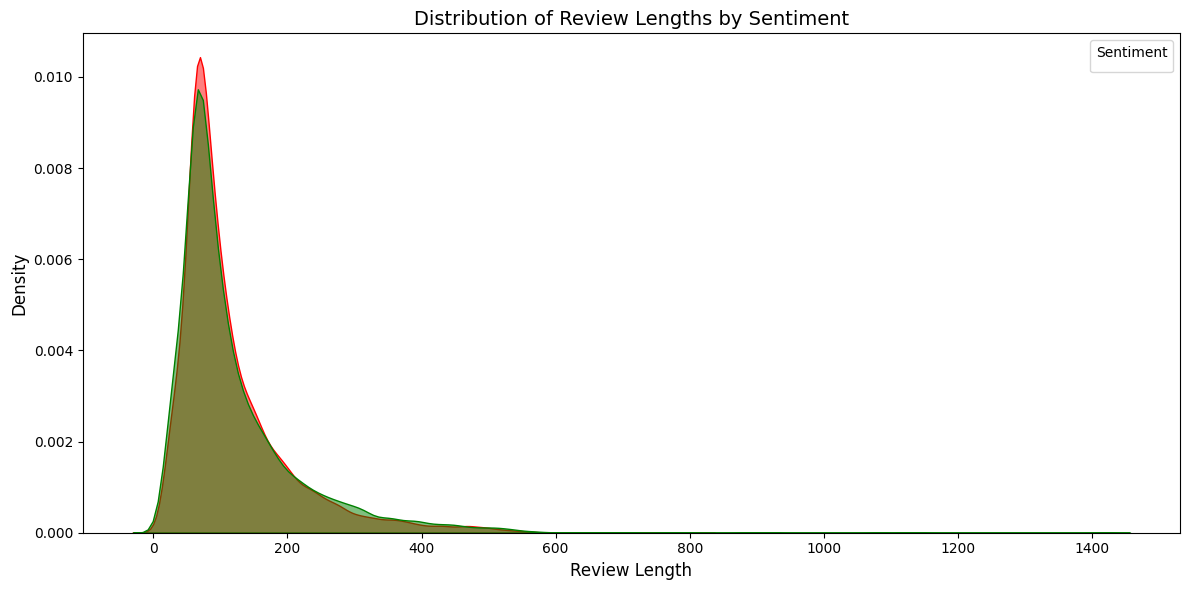

In [15]:
reviews["review_length"] = reviews["review"].apply(lambda x: len(x))

plt.figure(figsize=(12, 6))
sns.kdeplot(
    data=reviews,
    x="review_length",
    hue="sentiment",
    fill=True,
    common_norm=False,
    alpha=0.5,
    palette={"positive": "green", "negative": "red"}
)

plt.xlabel("Review Length", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Review Lengths by Sentiment", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()

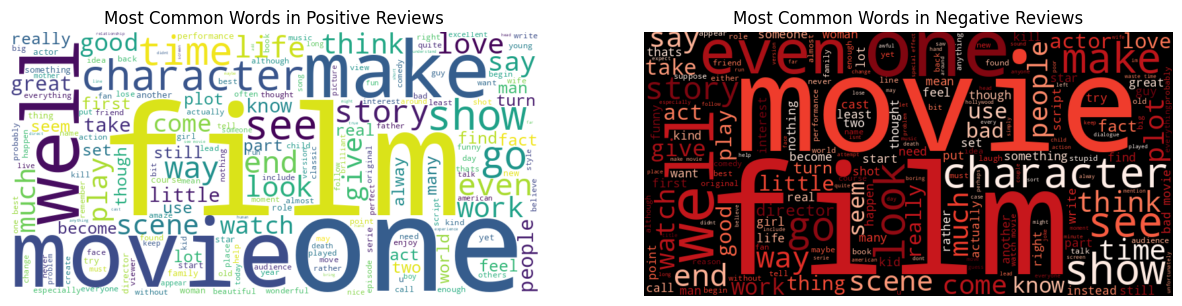

In [16]:
from wordcloud import WordCloud

positive_reviews = reviews[reviews["sentiment"] == "positive"]["review"].explode().tolist()
negative_reviews = reviews[reviews["sentiment"] == "negative"]["review"].explode().tolist()

pos_text = " ".join(positive_reviews)
neg_text = " ".join(negative_reviews)

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Most Common Words in Positive Reviews")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Most Common Words in Negative Reviews")
plt.axis('off')
plt.show()

### Embeddings

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, precision_score, make_scorer

In [18]:
X = reviews["review"].apply(lambda x: " ".join(x))
y = reviews["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

#### Bag of Words

In [19]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
bow_settings = {
	"Bag of Words - 50K Words": {'max_features': 50000, 'ngram_range': (1, 1)},
    "Bag of Words - 100K Words Update": {'max_features': 100000, 'ngram_range': (1, 1)},
    "Bag of Words - Bigram Update": {'max_features': 100000, 'ngram_range': (2, 2)},
    "Bag of Words - Mixed Unigram and Bigram Update": {'max_features': 100000, 'ngram_range': (1, 2)},
}

classifier_params = {
	"classifier__alpha": [0.1, 0.01, 1]
}

for desc, vec_params in bow_settings.items():
    print(f"Tuning {desc}...")

    bow_pipeline = Pipeline([
		("vectorizer", CountVectorizer(**vec_params)),
		("classifier", MultinomialNB())
	])
    
    bow_grid = GridSearchCV(
		estimator=bow_pipeline,
		param_grid=classifier_params,
		cv=folds,
		scoring="accuracy",
		n_jobs=1
	)
    bow_grid.fit(X_train, y_train)
    print(f"{desc} Results: Accuracy={round(bow_grid.best_score_, 3)}, Classifier Params={ bow_grid.best_params_}")

Tuning Bag of Words - 50K Words...
Bag of Words - 50K Words Results: Accuracy=0.851, Classifier Params={'classifier__alpha': 1}
Tuning Bag of Words - 100K Words Update...
Bag of Words - 100K Words Update Results: Accuracy=0.852, Classifier Params={'classifier__alpha': 1}
Tuning Bag of Words - Bigram Update...
Bag of Words - Bigram Update Results: Accuracy=0.868, Classifier Params={'classifier__alpha': 1}
Tuning Bag of Words - Mixed Unigram and Bigram Update...
Bag of Words - Mixed Unigram and Bigram Update Results: Accuracy=0.872, Classifier Params={'classifier__alpha': 0.1}


In [20]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
bow_settings = {
	"Bag of Words - 50K Words": {'max_features': 50000, 'ngram_range': (1, 1)},
    "Bag of Words - 100K Words Update": {'max_features': 100000, 'ngram_range': (1, 1)},
    "Bag of Words - Bigram Update": {'max_features': 100000, 'ngram_range': (2, 2)},
    "Bag of Words - Mixed Unigram and Bigram Update": {'max_features': 100000, 'ngram_range': (1, 2)},
}

classifier_params = {
	"classifier__C": [0.01, 0.1, 1, 10],
	"classifier__penalty": ["l1", "l2"],
	"classifier__solver": ["liblinear"]
}

for desc, vec_params in bow_settings.items():
    print(f"Tuning {desc}...")

    bow_pipeline = Pipeline([
		("vectorizer", CountVectorizer(**vec_params)),
		("classifier", LogisticRegression())
	])
    
    bow_grid = GridSearchCV(
		estimator=bow_pipeline,
		param_grid=classifier_params,
		cv=folds,
		scoring="accuracy",
		n_jobs=1
	)
    bow_grid.fit(X_train, y_train)
    print(f"{desc} Results: Accuracy={round(bow_grid.best_score_, 3)}, Classifier Params={ bow_grid.best_params_}")

Tuning Bag of Words - 50K Words...
Bag of Words - 50K Words Results: Accuracy=0.887, Classifier Params={'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Tuning Bag of Words - 100K Words Update...
Bag of Words - 100K Words Update Results: Accuracy=0.887, Classifier Params={'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Tuning Bag of Words - Bigram Update...
Bag of Words - Bigram Update Results: Accuracy=0.854, Classifier Params={'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Tuning Bag of Words - Mixed Unigram and Bigram Update...
Bag of Words - Mixed Unigram and Bigram Update Results: Accuracy=0.894, Classifier Params={'classifier__C': 0.1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [21]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
bow_settings = {
	"Bag of Words - 50K Words": {'max_features': 50000, 'ngram_range': (1, 1)},
    "Bag of Words - 100K Words Update": {'max_features': 100000, 'ngram_range': (1, 1)},
    "Bag of Words - Bigram Update": {'max_features': 100000, 'ngram_range': (2, 2)},
    "Bag of Words - Mixed Unigram and Bigram Update": {'max_features': 100000, 'ngram_range': (1, 2)},
}

classifier_params = {
	"classifier__loss": ["log_loss", "hinge"],
    "classifier__penalty": ["l2", "l1"],
    "classifier__alpha": [1e-4, 1e-3, 1e-2], 
}

for desc, vec_params in bow_settings.items():
    print(f"Tuning {desc}...")

    bow_pipeline = Pipeline([
		("vectorizer", CountVectorizer(**vec_params)),
		("classifier", SGDClassifier())
	])
    
    bow_grid = GridSearchCV(
		estimator=bow_pipeline,
		param_grid=classifier_params,
		cv=folds,
		scoring="accuracy",
		n_jobs=1
	)
    bow_grid.fit(X_train, y_train)
    print(f"{desc} Results: Accuracy={round(bow_grid.best_score_, 3)}, Classifier Params={ bow_grid.best_params_}")

Tuning Bag of Words - 50K Words...
Bag of Words - 50K Words Results: Accuracy=0.884, Classifier Params={'classifier__alpha': 0.001, 'classifier__loss': 'hinge', 'classifier__penalty': 'l2'}
Tuning Bag of Words - 100K Words Update...
Bag of Words - 100K Words Update Results: Accuracy=0.884, Classifier Params={'classifier__alpha': 0.001, 'classifier__loss': 'hinge', 'classifier__penalty': 'l2'}
Tuning Bag of Words - Bigram Update...
Bag of Words - Bigram Update Results: Accuracy=0.854, Classifier Params={'classifier__alpha': 0.0001, 'classifier__loss': 'log_loss', 'classifier__penalty': 'l2'}
Tuning Bag of Words - Mixed Unigram and Bigram Update...
Bag of Words - Mixed Unigram and Bigram Update Results: Accuracy=0.892, Classifier Params={'classifier__alpha': 0.001, 'classifier__loss': 'log_loss', 'classifier__penalty': 'l2'}


#### TF-IDF

In [22]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
tfidf_settings = {
  "TF-IDF - 50K Words": {
    "max_features": 50000,
    "ngram_range": (1, 1),
    "min_df": 1
  },
  "TF-IDF - 100K Words Update": {
    "max_features": 100000,
    "ngram_range": (1, 1),
    "min_df": 1
  },
  "TF-IDF - Bigram Update": {
    "max_features": 100000,
    "ngram_range": (2, 2),
    "min_df": 1
  },
  "TF-IDF - Mixed Unigram and Bigram Update": {
    "max_features": 100000,
    "ngram_range": (1, 2),
    "min_df": 1
  },
  "TF-IDF - More than 5 Occurrences Update": {
    "max_features": 100000,
    "ngram_range": (2, 2),
    "min_df": 5
  },
}

classifier_params = {
	"classifier__alpha": [0.1, 0.01, 1]
}

for desc, vec_params in tfidf_settings.items():
    print(f"Tuning {desc}...")

    tfidf_pipeline = Pipeline([
      ("vectorizer", TfidfVectorizer(**vec_params)),
      ("classifier", MultinomialNB())
    ])
    
    tfidf_grid = GridSearchCV(
      estimator=tfidf_pipeline,
      param_grid=classifier_params,
      cv=folds,
      scoring="accuracy",
      n_jobs=1
    )
    tfidf_grid.fit(X_train, y_train)
    
    tfidf_grid.fit(X_train, y_train)
    print(f"{desc} Results: Accuracy={round(tfidf_grid.best_score_, 3)}, Classifier Params={tfidf_grid.best_params_}")


Tuning TF-IDF - 50K Words...
TF-IDF - 50K Words Results: Accuracy=0.858, Classifier Params={'classifier__alpha': 1}
Tuning TF-IDF - 100K Words Update...
TF-IDF - 100K Words Update Results: Accuracy=0.858, Classifier Params={'classifier__alpha': 1}
Tuning TF-IDF - Bigram Update...
TF-IDF - Bigram Update Results: Accuracy=0.871, Classifier Params={'classifier__alpha': 1}
Tuning TF-IDF - Mixed Unigram and Bigram Update...
TF-IDF - Mixed Unigram and Bigram Update Results: Accuracy=0.88, Classifier Params={'classifier__alpha': 0.1}
Tuning TF-IDF - More than 5 Occurrences Update...
TF-IDF - More than 5 Occurrences Update Results: Accuracy=0.869, Classifier Params={'classifier__alpha': 1}


In [23]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
tfidf_settings = {
  "TF-IDF - 50K Words": {
    "max_features": 50000,
    "ngram_range": (1, 1),
    "min_df": 1
  },
  "TF-IDF - 100K Words Update": {
    "max_features": 100000,
    "ngram_range": (1, 1),
    "min_df": 1
  },
  "TF-IDF - Bigram Update": {
    "max_features": 100000,
    "ngram_range": (2, 2),
    "min_df": 1
  },
  "TF-IDF - Mixed Unigram and Bigram Update": {
    "max_features": 100000,
    "ngram_range": (1, 2),
    "min_df": 1
  },
  "TF-IDF - More than 5 Occurrences Update": {
    "max_features": 100000,
    "ngram_range": (2, 2),
    "min_df": 5
  },
}

classifier_params = {
	"classifier__C": [0.01, 0.1, 1, 10],
	"classifier__penalty": ["l1", "l2"],
	"classifier__solver": ["liblinear"]
}

for desc, vec_params in tfidf_settings.items():
    print(f"Tuning {desc}...")

    tfidf_pipeline = Pipeline([
      ("vectorizer", TfidfVectorizer(**vec_params)),
      ("classifier", LogisticRegression())
    ])
    
    tfidf_grid = GridSearchCV(
      estimator=tfidf_pipeline,
      param_grid=classifier_params,
      cv=folds,
      scoring="accuracy",
      n_jobs=1
    )
    tfidf_grid.fit(X_train, y_train)
    
    tfidf_grid.fit(X_train, y_train)
    print(f"{desc} Results: Accuracy={round(tfidf_grid.best_score_, 3)}, Classifier Params={tfidf_grid.best_params_}")

Tuning TF-IDF - 50K Words...
TF-IDF - 50K Words Results: Accuracy=0.89, Classifier Params={'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Tuning TF-IDF - 100K Words Update...
TF-IDF - 100K Words Update Results: Accuracy=0.891, Classifier Params={'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Tuning TF-IDF - Bigram Update...
TF-IDF - Bigram Update Results: Accuracy=0.862, Classifier Params={'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Tuning TF-IDF - Mixed Unigram and Bigram Update...
TF-IDF - Mixed Unigram and Bigram Update Results: Accuracy=0.901, Classifier Params={'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Tuning TF-IDF - More than 5 Occurrences Update...
TF-IDF - More than 5 Occurrences Update Results: Accuracy=0.861, Classifier Params={'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [ ]:
folds = KFold(n_splits=5, shuffle=True, random_state=42)
tfidf_settings = {
  "TF-IDF - 50K Words": {
    "max_features": 50000,
    "ngram_range": (1, 1),
    "min_df": 1
  },
  "TF-IDF - 100K Words Update": {
    "max_features": 100000,
    "ngram_range": (1, 1),
    "min_df": 1
  },
  "TF-IDF - Bigram Update": {
    "max_features": 100000,
    "ngram_range": (2, 2),
    "min_df": 1
  },
  "TF-IDF - Mixed Unigram and Bigram Update": {
    "max_features": 100000,
    "ngram_range": (1, 2),
    "min_df": 1
  },
  "TF-IDF - More than 5 Occurrences Update": {
    "max_features": 100000,
    "ngram_range": (2, 2),
    "min_df": 5
  },
}

classifier_params = {
	"classifier__loss": ["log_loss", "hinge"],
    "classifier__penalty": ["l2", "l1"],
    "classifier__alpha": [1e-4, 1e-3, 1e-2], 
}

for desc, vec_params in tfidf_settings.items():
    print(f"Tuning {desc}...")

    tfidf_pipeline = Pipeline([
      ("vectorizer", TfidfVectorizer(**vec_params)),
      ("classifier", SGDClassifier())
    ])
    
    tfidf_grid = GridSearchCV(
      estimator=tfidf_pipeline,
      param_grid=classifier_params,
      cv=folds,
      scoring="accuracy",
      n_jobs=1
    )
    tfidf_grid.fit(X_train, y_train)
    
    tfidf_grid.fit(X_train, y_train)
    print(f"{desc} Results: Accuracy={round(tfidf_grid.best_score_, 3)}, Classifier Params={tfidf_grid.best_params_}")